# WeatherPy

---

## Maria's work to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    #print (city_url) #checking

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()
        #print(city_json) #DEBUGGING: SEE THE LIBRARY BEFORE CONTINUING!!
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        print (city)
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]
   
        #Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    #print (city_data)
    #break
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | malpica
malpica
Processing Record 3 of Set 1 | boende
boende
Processing Record 4 of Set 1 | badger
badger
Processing Record 5 of Set 1 | adamstown
adamstown
Processing Record 6 of Set 1 | kone
kone
Processing Record 7 of Set 1 | sarina
sarina
Processing Record 8 of Set 1 | hithadhoo
hithadhoo
Processing Record 9 of Set 1 | new norfolk
new norfolk
Processing Record 10 of Set 1 | ciudad bolivar
ciudad bolivar
Processing Record 11 of Set 1 | georgetown
georgetown
Processing Record 12 of Set 1 | wailua homesteads
wailua homesteads
Processing Record 13 of Set 1 | hammerfest
hammerfest
Processing Record 14 of Set 1 | kingscliff
kingscliff
Processing Record 15 of Set 1 | inarajan village
inarajan village
Processing Record 16 of Set 1 | iqaluit
iqaluit
Processing Record 17 of Set 1 | bethel
bethel
Processing Record 18 of Set

sarichioi
Processing Record 4 of Set 4 | west gulfport
west gulfport
Processing Record 5 of Set 4 | labytnangi
labytnangi
Processing Record 6 of Set 4 | mount isa
mount isa
Processing Record 7 of Set 4 | antsiranana
antsiranana
Processing Record 8 of Set 4 | menongue
menongue
Processing Record 9 of Set 4 | asau village
City not found. Skipping...
Processing Record 10 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 4 | san patricio
san patricio
Processing Record 12 of Set 4 | berdsk
berdsk
Processing Record 13 of Set 4 | saipan
saipan
Processing Record 14 of Set 4 | aioun
aioun
Processing Record 15 of Set 4 | port elizabeth
port elizabeth
Processing Record 16 of Set 4 | tot'ma
tot'ma
Processing Record 17 of Set 4 | alice springs
alice springs
Processing Record 18 of Set 4 | punta arenas
punta arenas
Processing Record 19 of Set 4 | yuzhno-kurilsk
yuzhno-kurilsk
Processing Record 20 of Set 4 | victorica
victorica
Processing Record 21 of Set 4 | afaahiti
afaahi

karratha
Processing Record 10 of Set 7 | laayoune plage
City not found. Skipping...
Processing Record 11 of Set 7 | coos bay
coos bay
Processing Record 12 of Set 7 | jhang sadr
jhang sadr
Processing Record 13 of Set 7 | lihue
lihue
Processing Record 14 of Set 7 | kruisfontein
kruisfontein
Processing Record 15 of Set 7 | mount pearl
mount pearl
Processing Record 16 of Set 7 | inyati
inyati
Processing Record 17 of Set 7 | freetown
freetown
Processing Record 18 of Set 7 | kish
kish
Processing Record 19 of Set 7 | nemuro
nemuro
Processing Record 20 of Set 7 | cruzeiro do sul
cruzeiro do sul
Processing Record 21 of Set 7 | morden
morden
Processing Record 22 of Set 7 | oranjemund
oranjemund
Processing Record 23 of Set 7 | anaconda
anaconda
Processing Record 24 of Set 7 | tranqueras
tranqueras
Processing Record 25 of Set 7 | franceville
franceville
Processing Record 26 of Set 7 | leava
leava
Processing Record 27 of Set 7 | naze
naze
Processing Record 28 of Set 7 | havre
havre
Processing Recor

baishishan
Processing Record 18 of Set 10 | sinop
sinop
Processing Record 19 of Set 10 | desaguadero
desaguadero
Processing Record 20 of Set 10 | port lincoln
port lincoln
Processing Record 21 of Set 10 | galle
galle
Processing Record 22 of Set 10 | ambon
ambon
Processing Record 23 of Set 10 | brookings
brookings
Processing Record 24 of Set 10 | mirpur bhtoro
mirpur bhtoro
Processing Record 25 of Set 10 | bafoulabe
bafoulabe
Processing Record 26 of Set 10 | smidovich
smidovich
Processing Record 27 of Set 10 | whakatane
whakatane
Processing Record 28 of Set 10 | thabazimbi
thabazimbi
Processing Record 29 of Set 10 | bonny
bonny
Processing Record 30 of Set 10 | dalby
dalby
Processing Record 31 of Set 10 | cape coast
cape coast
Processing Record 32 of Set 10 | menaka
menaka
Processing Record 33 of Set 10 | kon tum
kon tum
Processing Record 34 of Set 10 | torres
torres
Processing Record 35 of Set 10 | i-n-salah
i-n-salah
Processing Record 36 of Set 10 | nikolayevsk-on-amure
nikolayevsk-on-

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,281.48,88,75,6.00,RU,1697470240
1,malpica,43.3228,-8.8105,293.28,87,100,4.51,ES,1697470513
2,boende,-0.2167,20.8667,298.82,79,96,0.61,CD,1697470237
3,badger,64.8000,-147.5333,273.70,87,0,2.57,US,1697470497
4,adamstown,-25.0660,-130.1015,294.11,86,20,5.98,PN,1697470514


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,281.48,88,75,6.00,RU,1697470240
1,malpica,43.3228,-8.8105,293.28,87,100,4.51,ES,1697470513
2,boende,-0.2167,20.8667,298.82,79,96,0.61,CD,1697470237
3,badger,64.8000,-147.5333,273.70,87,0,2.57,US,1697470497
4,adamstown,-25.0660,-130.1015,294.11,86,20,5.98,PN,1697470514


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

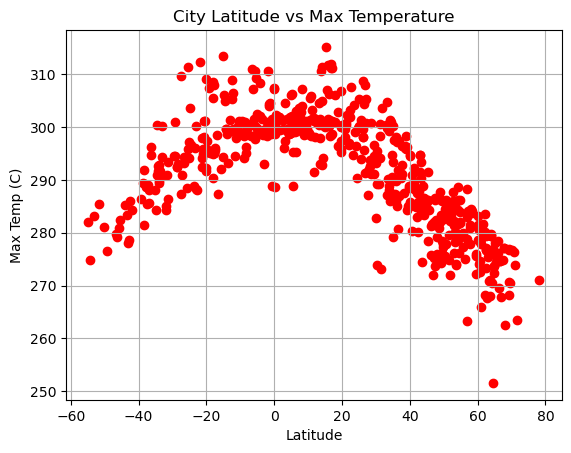

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", color = 'r')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

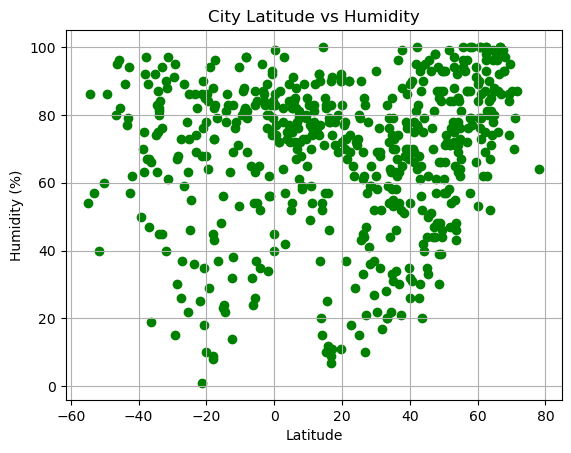

In [10]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o",color ='g')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

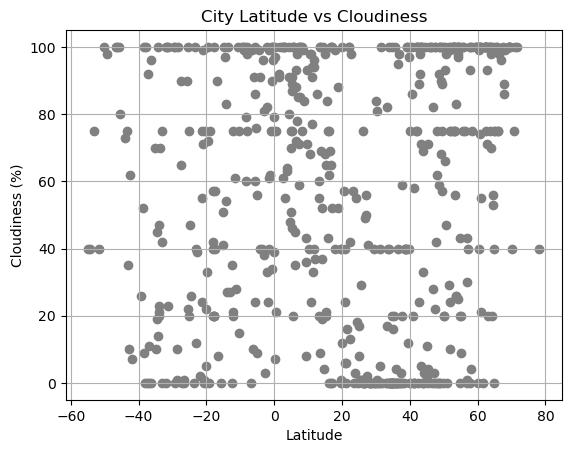

In [11]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o",color = "gray")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

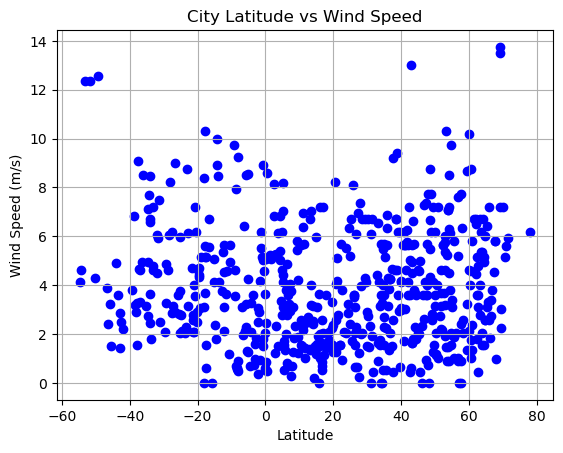

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o",color = 'b')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# create a function to repeat the linear regression scatter plots below

def my_scatter(df, x_col_name, y_col_name, hemi_name): #these are parameters
    x =df[x_col_name]
    y =df[y_col_name]
    plt.scatter(x,y)
    slope, intercept, r, p, se = linregress(x, y)
    res = linregress(x, y)
    print(f"R-squared: {res.rvalue**2:.6f}")
    plt.plot(x, y, 'o')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    #how do we label the line with the linear regression equation?
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.annotate(line_eq,(250, 20),fontsize=15,color="red")
    #plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,281.48,88,75,6.00,RU,1697470240
1,malpica,43.3228,-8.8105,293.28,87,100,4.51,ES,1697470513
3,badger,64.8000,-147.5333,273.70,87,0,2.57,US,1697470497
9,ciudad bolivar,8.1222,-63.5497,303.87,58,100,1.26,VE,1697470514
10,georgetown,5.4112,100.3354,301.11,84,20,1.54,MY,1697470233


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,boende,-0.2167,20.8667,298.82,79,96,0.61,CD,1697470237
4,adamstown,-25.0660,-130.1015,294.11,86,20,5.98,PN,1697470514
5,kone,-21.0595,164.8658,295.90,90,99,2.08,NC,1697470514
6,sarina,-21.4333,149.2167,292.38,1,24,2.09,AU,1697470514
7,hithadhoo,-0.6000,73.0833,300.77,74,34,8.91,MV,1697470514


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.746006


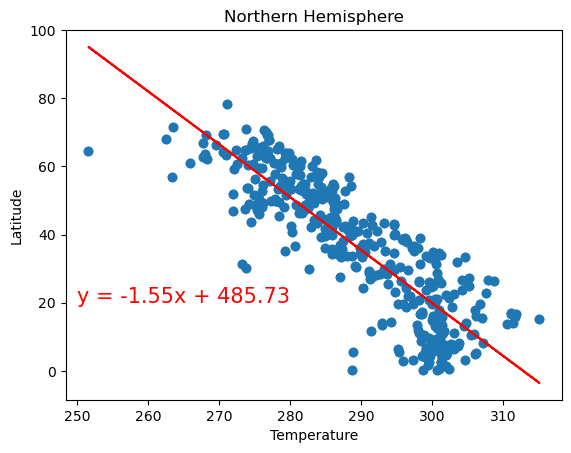

In [26]:
# Run function to plot the Linear regression on Northern Hemisphere
plt.title('Northern Hemisphere')
plt.xlabel('Temperature')
plt.ylabel('Latitude')
my_scatter(northern_hemi_df, "Max Temp", "Lat", "Northern")

R-squared: 0.537153
R-squared: 0.537153


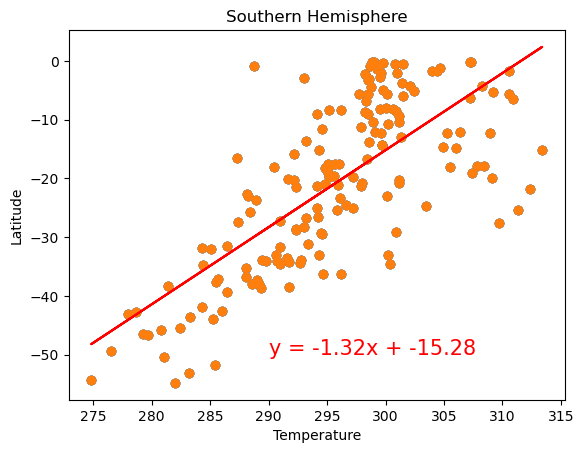

In [52]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Max Temp"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

plt.annotate(line_eq,(290, -50),fontsize=15,color="red")
my_scatter(southern_hemi_df, "Max Temp", "Lat", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

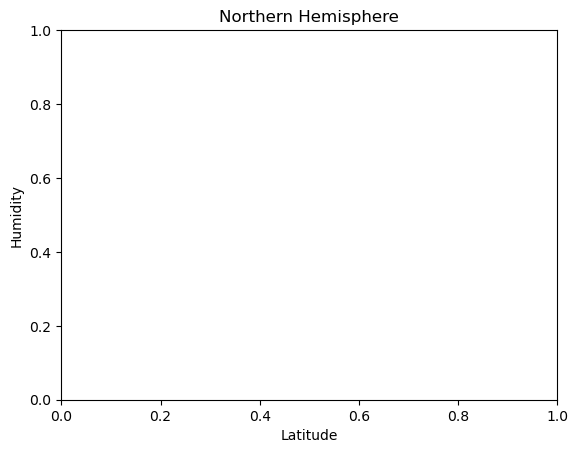

In [53]:
# Northern Hemisphere
x = northern_hemi_df["Humidity"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#my_scatter(northern_hemi_df, "Humidity", "Lat", "Northern")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20, 60),fontsize=15,color="red")
plt.show()

R-squared: 0.002402


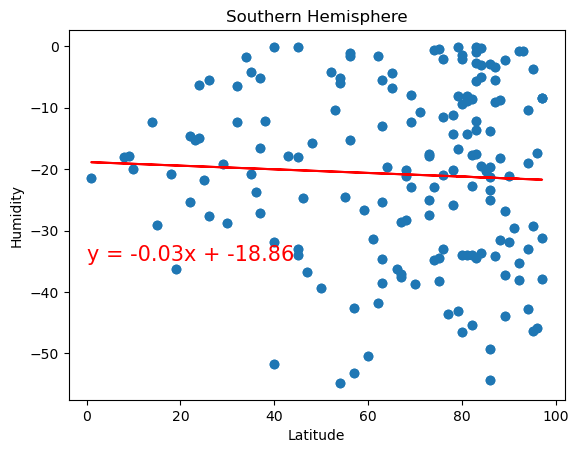

In [43]:
# Southern Hemisphere
x = southern_hemi_df["Humidity"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0, -35),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.011223


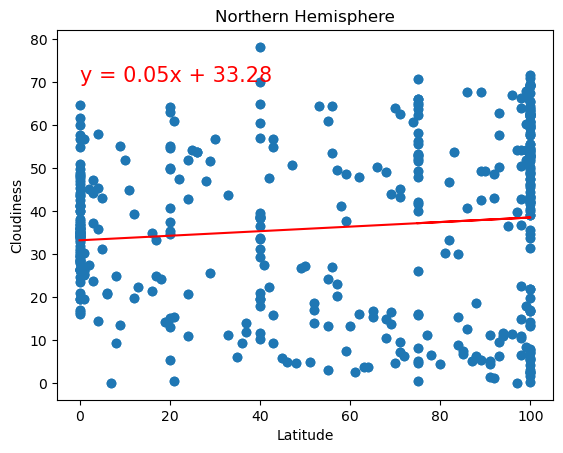

In [44]:
# Northern Hemisphere
x = northern_hemi_df["Cloudiness"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0, 70),fontsize=15,color="red")
plt.show()

R-squared: 0.018919


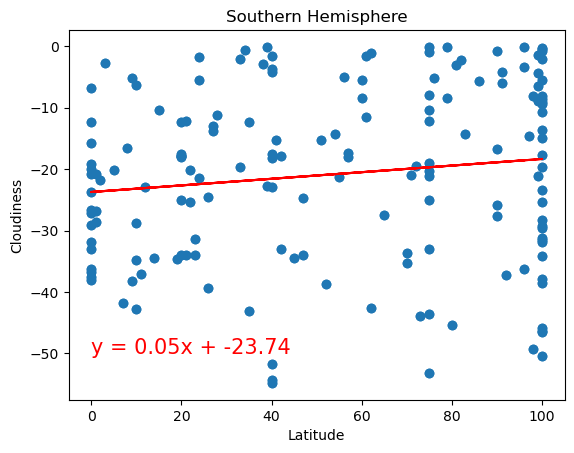

In [45]:
# Southern Hemisphere
x = southern_hemi_df["Cloudiness"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0, -50),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.031736


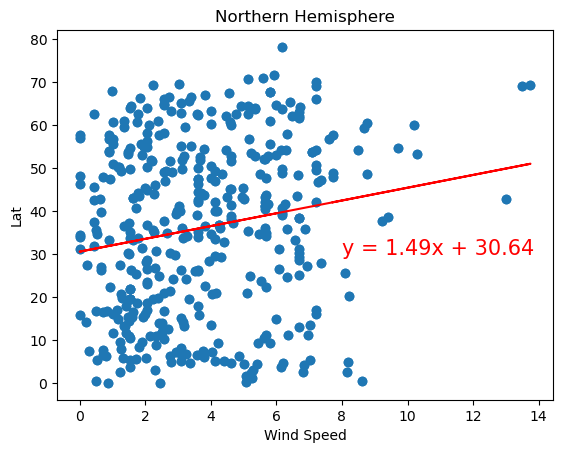

In [47]:
# Northern Hemisphere
x = northern_hemi_df["Wind Speed"]
y = northern_hemi_df["Lat"]
plt.title('Northern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8, 30),fontsize=15,color="red")
plt.show()

R-squared: 0.058202


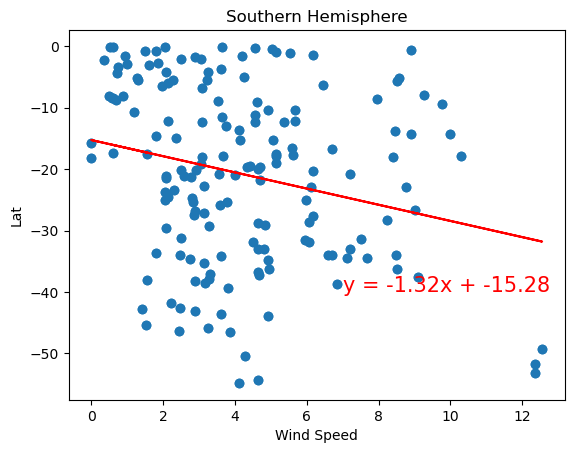

In [49]:
# Southern Hemisphere
x = southern_hemi_df["Wind Speed"]
y = southern_hemi_df["Lat"]
plt.title('Southern Hemisphere')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#Run the function here!!
plt.scatter(x,y)
slope, intercept, r, p, se = linregress(x, y)
res = linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(7, -40),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE